## **Imersão Dados 4ª edição**

*Aluno:* <br>
* Lukas Barbosa Veiga de Melo, 25;
* Engenheiro Ambiental;
* Mestrando em Desenvolvimento e Meio Ambiente, UFPB.
<br>
<br>

**[LinkedIn](www.linkedin.com/in/lukas-veiga-79371b20a
)** <br>
**[GitHub](https://github.com/Lukasveiga)**

## **Dataset: House price data of São Paulo (Adaptado)**

*Variáveis:*

* Rua - Localização da Rua onde a casa pertence;
* Bairro - Localização do Bairro onde a casa pertence
* Cidade - Cidade onde a Casa está localizada;
* Metragem - Área da casa em metros quadrados;
* Quartos - Número de quartos na casa;
* Banheiros - Número de banheiros na casa;
* Vagas - Número de vagas na garagem;
* Valor - Preço da casa que está em moeda brasileira BRL;
<br>

**Fonte(Original):** https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo <br>
**Fonte(Adaptado):** https://gist.github.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891

In [2]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

## Configuracões pandas
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Bibliotecas de Visualização
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Configurações de Visualização
sns.set_style('darkgrid')
sns.set_context('paper', font_scale= 1.2)

# Visualização de dados faltantes
import missingno as msno

In [3]:
# Importação do banco de dados
path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data = pd.read_csv(path)

# Primeiras linhas e formato do banco de dados (shape)
print(data.shape)
data.head(10)

(10008, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


### **1.Sanity Check and Data Filtering**

In [4]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


**OBS:** Quando utilizamos a função `.info()` é possível verificar o tipo de dado para cada variável. Quando uma variável retorna o tipo como *objeto* é possível que exista algum erro ou valor faltante principalmente se para essa variável é esperado um tipo inteiro(int) ou flutuante(float), sendo necessário verificar mais a fundo essas variáveis.

In [5]:
# Verificando os dados da variável 'Valor'
data['Valor'].sample(10)

1266                             R$ 1.190.000
356                              R$ 3.000.000
704                              R$ 5.000.000
2114                             R$ 2.750.000
1002                             R$ 3.500.000
1660                             R$ 3.200.000
6419                               R$ 670.000
4490                             R$ 3.200.000
7428                             R$ 1.980.000
2637    R$ 10.000\n                      /Mês
Name: Valor, dtype: object

* Observando diferentes amostras da série 'Valor' é possível notar que existe valores referentes a um aluguel diário, mensal ou anual que difere do comportamento esperado de venda.

In [6]:
# Separando os dados da Série 'Valor' com a função split + expand
valor_split = data['Valor'].str.split(expand = True)
valor_split

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [7]:
# Verificando os dados para cada coluna criada com o método split + expand
for i in range(0,3):
    print(valor_split[i].unique())

['R$']
['7.000.000' '3.700.000' '380.000' ... '553.000' '951.000' '2.200']
[None '/Mês' '/Ano' '/Dia']


In [8]:
# Atualizando o dataframe original com os novos valores separados
data[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = data['Valor'].str.split(expand = True)

data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


**OBS:** Como desejamos para esse projeto criar um modelo de regressão que faça a predição dos valores de vendas iremos filtrar os valores de aluguel.

In [9]:
# Novo dataframe com apenas os valores de venda dos imóveis
data_vendas = data[data['Tipo_anuncio'].isnull()]

# Também iremos remover as colunas 'Valor', 'Moeda' e 'Tipo_anuncio'
data_vendas = data_vendas.drop(['Valor', 'Moeda', 'Tipo_anuncio'], axis = 1)

print(data_vendas.shape)
data_vendas.head()

(9156, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [10]:
# Transformando os dados da coluna 'Valor_anuncio' para o formato float
data_vendas['Valor_anuncio'] = data_vendas['Valor_anuncio'].str.replace('.', '').astype('float')

data_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor_anuncio  9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


/tmp/ipykernel_81884/712752553.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_vendas['Valor_anuncio'] = data_vendas['Valor_anuncio'].str.replace('.', '').astype('float')


In [11]:
# Verificando dados faltantes
data_vendas.isnull().sum()

Rua              3049
Bairro             10
Cidade              0
Metragem            0
Quartos             0
Banheiros           0
Vagas               0
Valor_anuncio       0
dtype: int64

<AxesSubplot:>

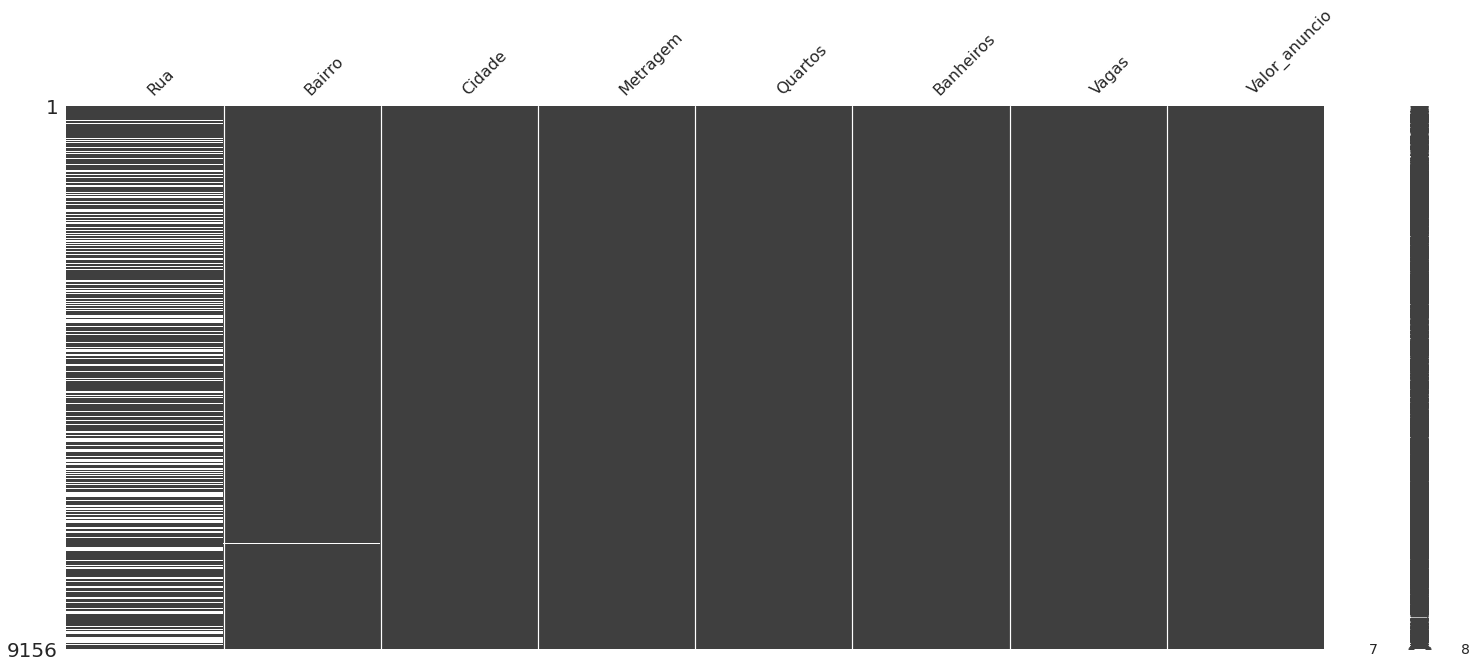

In [12]:
# Matrix msno
msno.matrix(data_vendas)

In [13]:
# Ruas sem o nome do Bairro
data_vendas[data_vendas['Bairro'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,640000.00
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,6895000.00
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,4000000.00
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,3890000.00
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,São Paulo,358,4,6,7,1600000.00
9540,"Rua Pacobá, 3773",NaN,São Paulo,1009,5,6,10,6400000.00


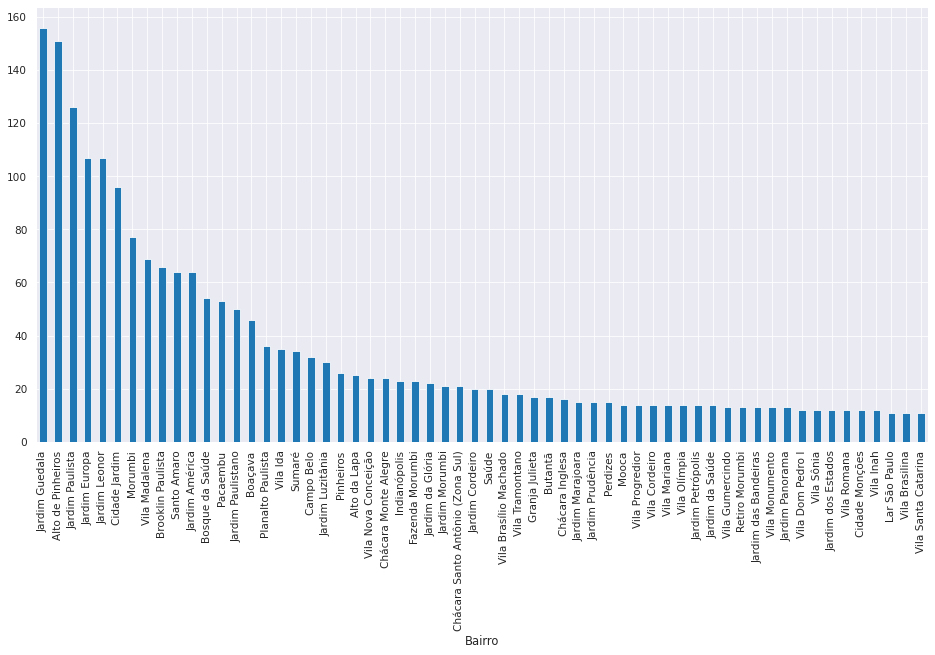

In [14]:
# Bairros sem o nome da rua, 60 maiores valores para melhor visualização
(data_vendas[data_vendas['Rua'].isnull()]
 .value_counts('Bairro')[:60]
 .plot(kind = 'bar', figsize = (16,8)));

### **2.Análise Explanatório dos Dados (EDA)**

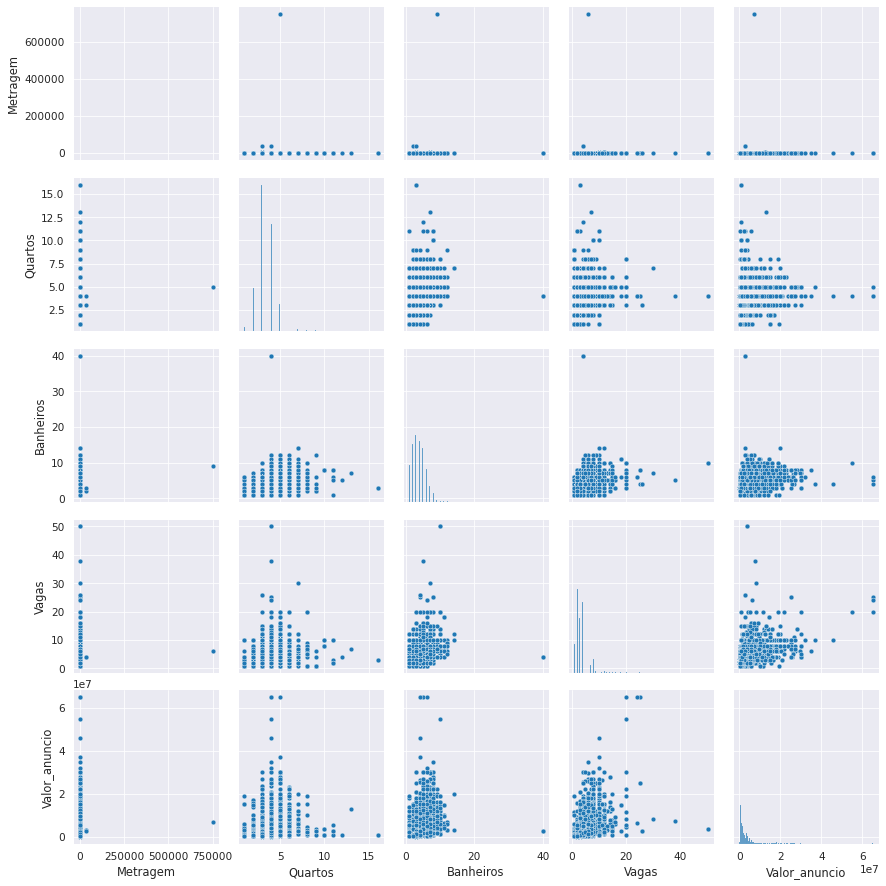

In [15]:
# Inicialmente utilizaremos a funcao 'pairplot' da biblioteca seaborn para visualizar de forma geral correlações entre variáveis e também a distribuição
sns.pairplot(data_vendas)

* A princípio não é possível observar nenhuma correlação positiva ou negativa que sejam relevantes, porém isso pode ser ocasionado pela presença de valores 'outliers' que acabam interferindo negativamente na análise de correlação entre as variáveis.

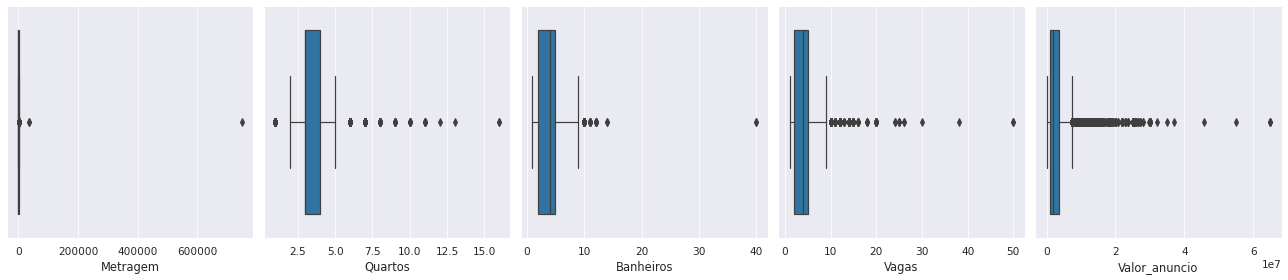

In [16]:
# Analisando os valores outliers
cols = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio']
ncols = len(cols)

fig, axes = plt.subplots(1, ncols, figsize = (18, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data = data_vendas, x = col, ax = ax)

plt.tight_layout()

* Observando os gráficos de boxplot é possível percerber os valores outliers, principalmente na variável 'Metragem'.

In [17]:
# Identificando valores outliers e removendo do dataset (Método Z-Score)
from scipy import stats

z = np.abs(stats.zscore(data_vendas[cols]))
print(z)

       Metragem  Quartos  Banheiros  Vagas  Valor_anuncio
0          0.07     0.53       2.14   0.78           1.00
1          0.01     0.53       0.10   0.02           0.16
2          0.04     0.53       0.41   0.75           0.68
3          0.02     0.43       0.91   0.02           0.60
4          0.04     0.43       0.91   0.75           0.64
...         ...      ...        ...    ...            ...
10002      0.02     0.43       1.12   0.02           0.39
10003      0.04     1.38       0.91   0.75           0.61
10004      0.02     4.34       1.63   0.40           0.19
10005      0.03     0.43       0.41   0.78           0.51
10007      0.04     0.43       0.91   0.75           0.71

[9156 rows x 5 columns]


* **Z-Score:** Nos da uma ideia de quão longe da média o dado está. Tecnicamente falando é a medida de quantos desvios padrão abaixo ou acima da média da populacão o dado está.

In [18]:
# Na maioria dos casos os outliers são indetificados quando o valor de 'z' é maior do que 3, ou seja 3 vezes o valor do desvio padrão.
filtro_zscore = (z < 3).all(axis=1)
data_vendas_filtrado = data_vendas[filtro_zscore]

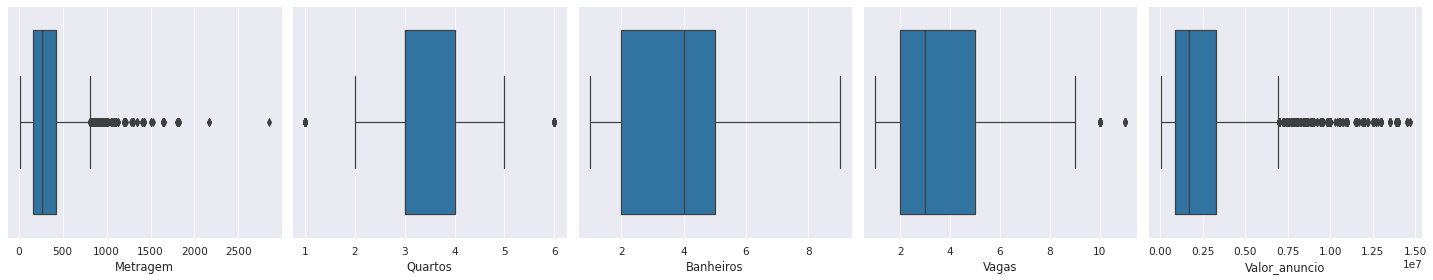

In [19]:
# Visualizando os dados após a remoção dos outliers
fig, axes = plt.subplots(1, ncols, figsize = (20, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data = data_vendas_filtrado, x = col, ax = ax)

plt.tight_layout()

In [20]:
# Adicionando uma nova coluna ao dataframe para reduzir a escala do valores dos imóveis
data_vendas_filtrado = data_vendas_filtrado.assign(Valor_anuncio_milhoes = lambda x: (x['Valor_anuncio']/1000000))

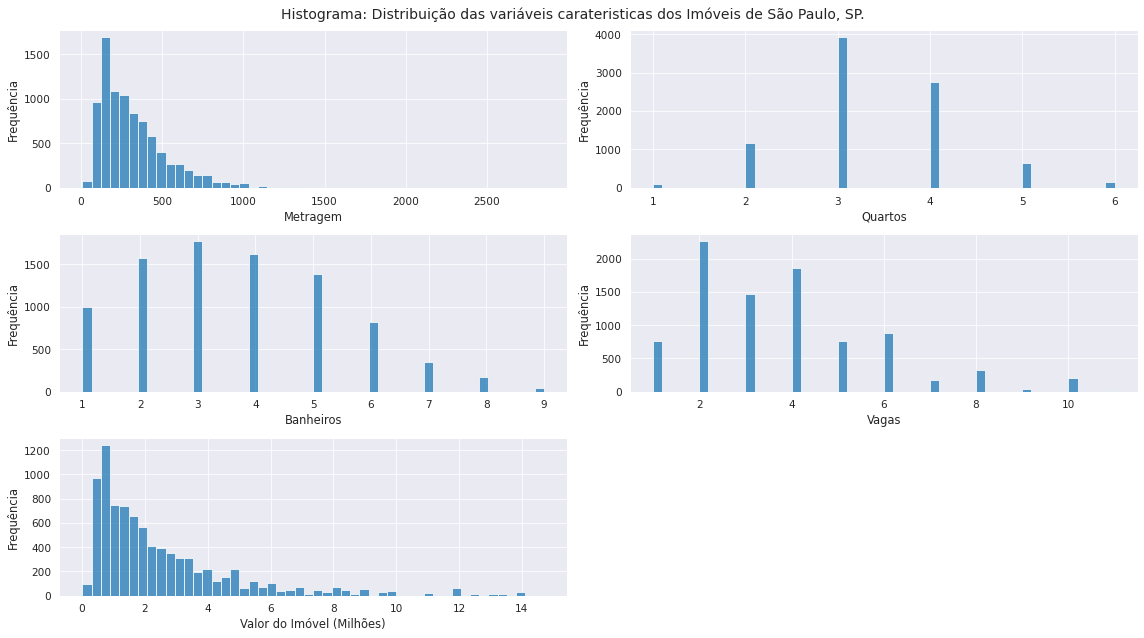

In [21]:
# Visualizando a distribuição de cada variável com os gráficos de histograma
cols = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio_milhoes']

fig, axes = plt.subplots(3, 2, figsize = (16, 9))

for col, ax in zip(cols, axes.flatten()):
    if col != 'Valor_anuncio_milhoes':
        sns.histplot(data = data_vendas_filtrado, x = col, ax = ax, bins = 50)
        ax.set(ylabel = 'Frequência')
    else:
        sns.histplot(data = data_vendas_filtrado, x = col, ax = ax, bins = 50)
        ax.set(xlabel = 'Valor do Imóvel (Milhões)', ylabel = 'Frequência')

fig.suptitle('Histograma: Distribuição das variáveis carateristicas dos Imóveis de São Paulo, SP.', fontsize = 14)
fig.delaxes(axes[2,1])

plt.tight_layout()

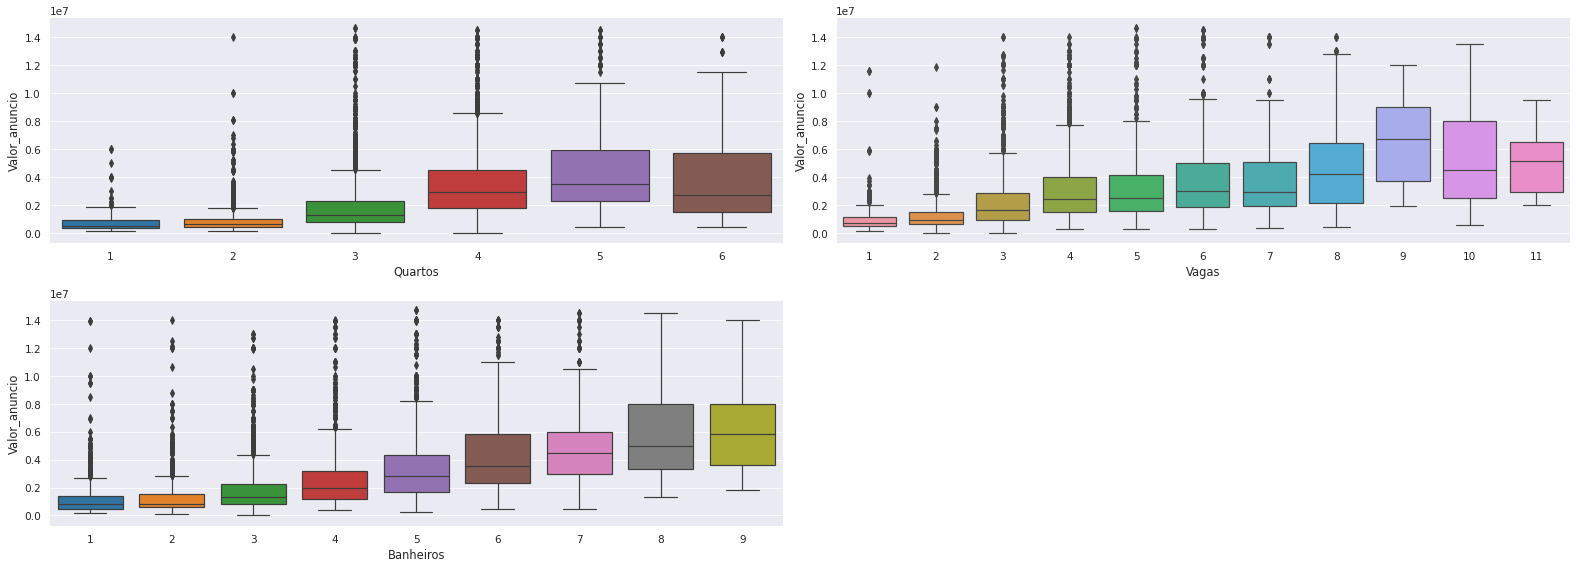

In [22]:
# Visualizando a distribuição das variáveis em relação ao valor dos imóveis
fig, ax = plt.subplots(2,2, figsize = (22,8))

sns.boxplot(data= data_vendas_filtrado, x = 'Quartos',   y = 'Valor_anuncio', ax = ax[0,0])
sns.boxplot(data= data_vendas_filtrado, x = 'Vagas',     y = 'Valor_anuncio', ax = ax[0,1])
sns.boxplot(data= data_vendas_filtrado, x = 'Banheiros', y = 'Valor_anuncio', ax = ax[1,0])

fig.delaxes(ax[1,1])
fig.tight_layout()

In [23]:
# Preço do metro quadrado por bairro
metragem_valor = data_vendas_filtrado.groupby('Bairro').sum()
metragem_valor = metragem_valor.assign(valor_m2 = lambda x: (x['Valor_anuncio']/x['Metragem']))
metragem_valor.reset_index(inplace= True)
metragem_valor

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2
0,Aclimação,19447,258,240,230,139292801.00,139.29,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,5708.74
2,Alto da Lapa,23075,242,294,296,162653500.00,162.65,7048.91
3,Alto da Mooca,5401,66,52,73,23683400.00,23.68,4385.00
4,Alto de Pinheiros,146621,1344,1652,1609,1582070915.00,1582.07,10790.21
...,...,...,...,...,...,...,...,...
686,Vila Água Funda,761,13,11,13,3260000.00,3.26,4283.84
687,Água Branca,2083,37,39,27,14718000.00,14.72,7065.77
688,Água Fria,1985,34,41,30,11125000.00,11.12,5604.53
689,Água Funda,278,6,5,4,1090000.00,1.09,3920.86


In [24]:
bairros = list(data_vendas_filtrado['Bairro'].value_counts()[:25].index)
bairros

['Alto de Pinheiros',
 'Jardim Guedala',
 'Brooklin Paulista',
 'Jardim Paulista',
 'Vila Madalena',
 'Pacaembu',
 'Planalto Paulista',
 'Cidade Jardim',
 'Vila Mariana',
 'Jardim Leonor',
 'Santo Amaro',
 'Morumbi',
 'Jardim Europa',
 'Campo Belo',
 'Sumaré',
 'Jardim Paulistano',
 'Bosque da Saúde',
 'Jardim da Glória',
 'Indianópolis',
 'Boaçava',
 'Vila Nova Conceição',
 'Cambuci',
 'Pinheiros',
 'Vila Monumento',
 'Jardim Luzitânia']

In [25]:
fig = px.scatter(metragem_valor.query('Bairro in @bairros'), x = 'Metragem', y = 'Valor_anuncio_milhoes', hover_name = 'Bairro', size = 'valor_m2',
                                    size_max = 60, log_x= True)

fig.show()

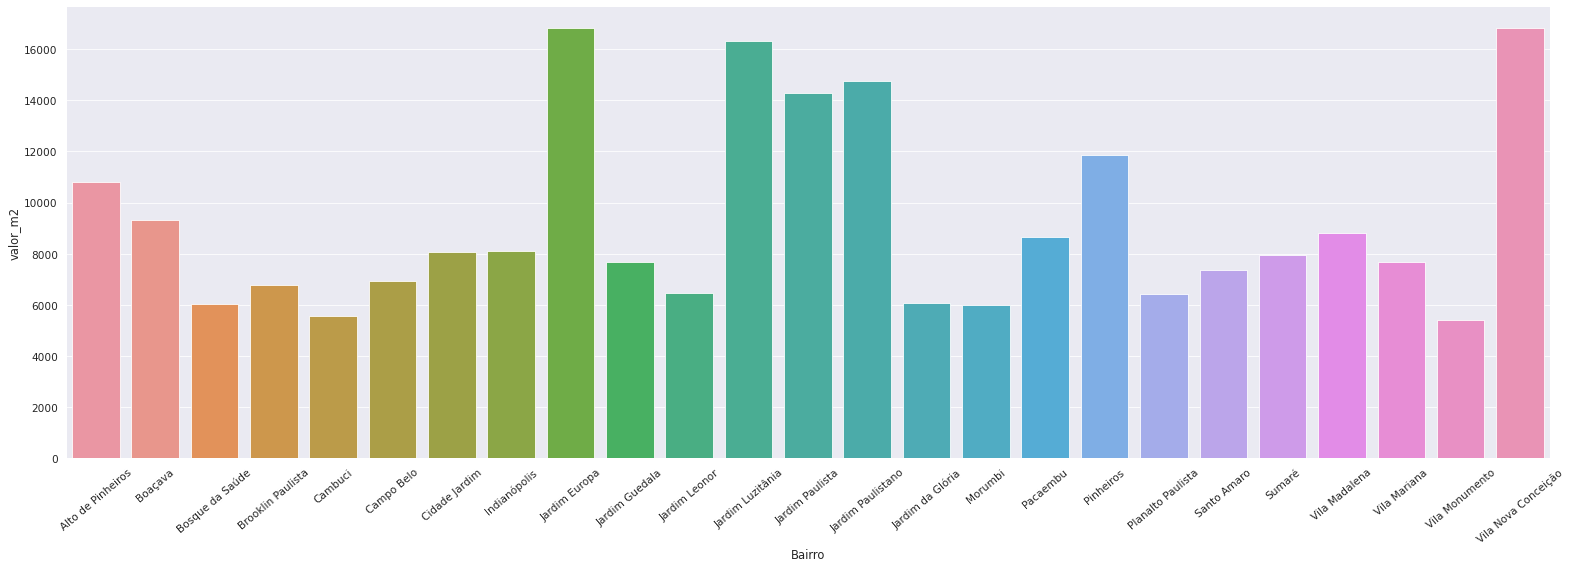

In [26]:
plt.figure(figsize = (22,8))
ax = sns.barplot(data = metragem_valor.query('Bairro in @bairros'), x = 'Bairro', y = 'valor_m2')
ax.tick_params(axis = 'x', rotation = 40)
plt.tight_layout()

In [27]:
# Visualizando a metragem e o valor dos imóveis correspondentes as seguintes variáveis: Quartos, banheiros e vagas

# 1 - Quartos
data_por_quartos = data_vendas_filtrado.groupby('Quartos').mean()
data_por_quartos.reset_index(inplace = True)
data_por_quartos

,Quartos,Metragem,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes
0,1,153.66,1.59,1.86,1012728.67,1.01
1,2,150.21,2.02,2.18,954146.21,0.95
2,3,251.29,3.22,3.29,1912036.66,1.91
3,4,432.30,4.55,4.56,3614017.37,3.61
4,5,554.85,5.50,5.31,4413583.81,4.41
5,6,527.78,5.12,4.76,4027480.77,4.03


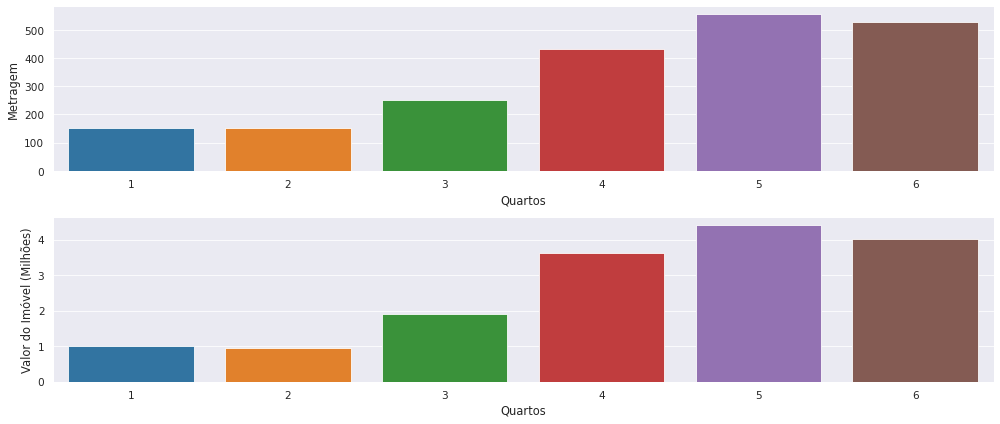

In [28]:
fig, ax = plt.subplots(2, figsize = (14, 6))
sns.barplot(data = data_por_quartos, x = 'Quartos', y = 'Metragem', ax = ax[0])
sns.barplot(data = data_por_quartos, x = 'Quartos', y = 'Valor_anuncio_milhoes', ax = ax[1])
ax[1].set(ylabel = 'Valor do Imóvel (Milhões)')
plt.tight_layout()

In [29]:
# 2 - Banheiros
data_por_banheiros = data_vendas_filtrado.groupby('Banheiros').mean()
data_por_banheiros.reset_index(inplace = True)
data_por_banheiros

,Banheiros,Metragem,Quartos,Vagas,Valor_anuncio,Valor_anuncio_milhoes
0,1,195.48,2.62,2.73,1188401.35,1.19
1,2,193.73,2.84,2.67,1303183.29,1.30
2,3,251.81,3.20,3.21,1871674.37,1.87
3,4,323.38,3.50,3.88,2570289.89,2.57
4,5,409.40,3.71,4.34,3436765.14,3.44
5,6,502.42,4.05,5.05,4367245.14,4.37
6,7,588.84,4.35,5.56,5074910.83,5.07
7,8,698.35,4.36,6.33,5975517.86,5.98
8,9,725.11,4.69,6.33,6452000.00,6.45


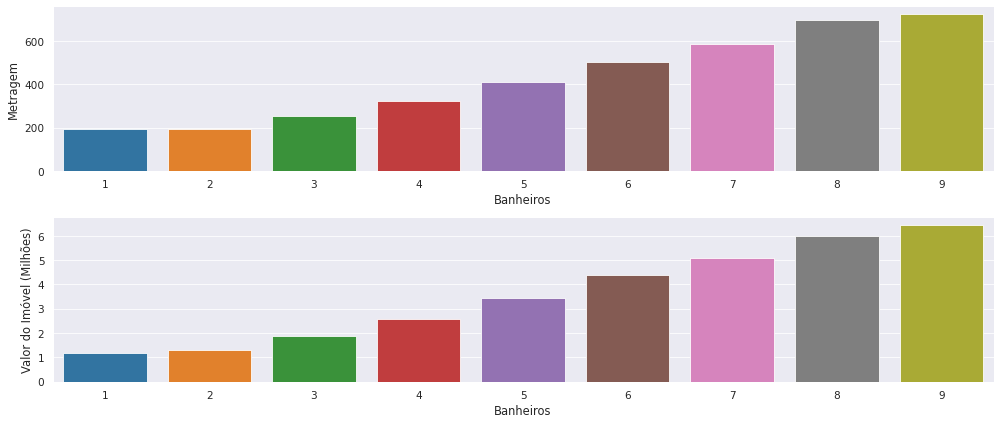

In [30]:
fig, ax = plt.subplots(2, figsize = (14, 6))
sns.barplot(data = data_por_banheiros, x = 'Banheiros', y = 'Metragem', ax = ax[0])
sns.barplot(data = data_por_banheiros, x = 'Banheiros', y = 'Valor_anuncio_milhoes', ax = ax[1])
ax[1].set(ylabel = 'Valor do Imóvel (Milhões)')
plt.tight_layout()

In [31]:
# 3 - Vagas
data_por_vagas = data_vendas_filtrado.groupby('Vagas').mean()
data_por_vagas.reset_index(inplace = True)
data_por_vagas

,Vagas,Metragem,Quartos,Banheiros,Valor_anuncio,Valor_anuncio_milhoes
0,1,145.78,2.52,2.10,936091.37,0.94
1,2,188.72,2.94,2.77,1294693.64,1.29
2,3,283.36,3.34,3.61,2280744.57,2.28
3,4,368.51,3.63,4.23,3120221.79,3.12
4,5,393.80,3.70,4.13,3283274.98,3.28
5,6,483.62,3.81,4.66,3820797.38,3.82
6,7,507.53,4.03,4.65,4078979.03,4.08
7,8,560.23,3.97,5.07,4654340.88,4.65
8,9,734.00,4.15,5.38,6547264.71,6.55
9,10,723.94,4.07,5.31,5132862.03,5.13


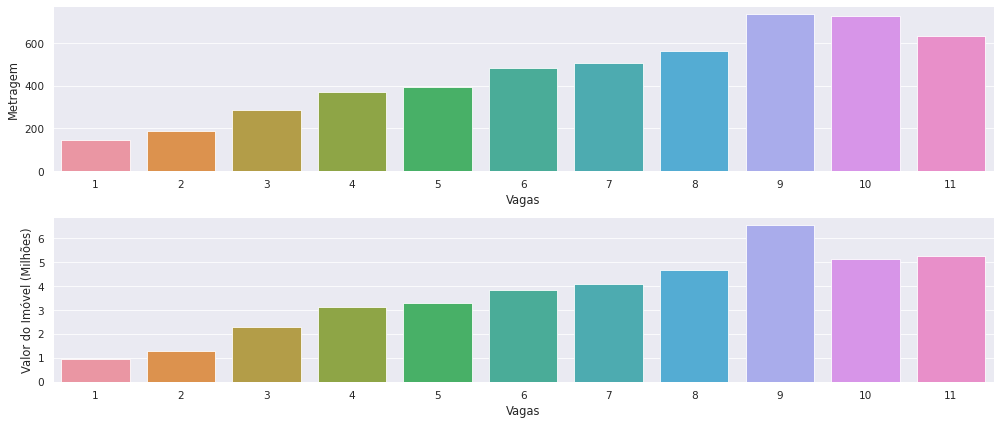

In [32]:
fig, ax = plt.subplots(2, figsize = (14, 6))
sns.barplot(data = data_por_vagas, x = 'Vagas', y = 'Metragem', ax = ax[0])
sns.barplot(data = data_por_vagas, x = 'Vagas', y = 'Valor_anuncio_milhoes', ax = ax[1])
ax[1].set(ylabel = 'Valor do Imóvel (Milhões)')
plt.tight_layout()

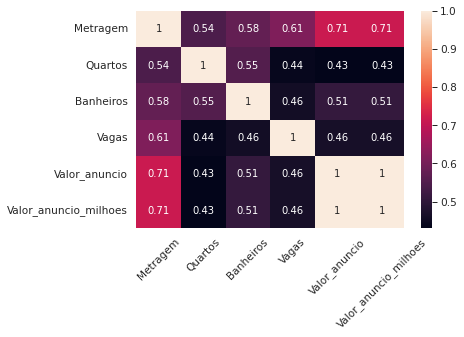

In [33]:
# Análise de correlação com o gráfico heatmap
ax = sns.heatmap(data_vendas_filtrado.corr(), annot= True)
ax.tick_params(axis = 'x', rotation = 45)

* Analisando os gráficos relacionando a metragem e o valor dos imóveis com os números de quartos, vagas e banheiros é possível perceber uma correlação de proporcionalidade, relembrando que essa análise foi realizada com os dados sem os valores outliers. Ou seja quanto maior o número de quartos e banheiros maior a metragem e o valor do imóvel, como é de se esperar; fugindo um pouco da regra, se tratando do número de vagas é possível observar um pico nos valores de metragem e valor do imóvel com o número de vagas igual a 9 e uma redução nos valores seguintes.

### **3.Dados IBGE**

 - Descrição das Variáveis:

 * 


In [34]:
# Importação dos dados do IBGE
path = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
data_ibge = pd.read_csv(path, encoding = 'UTF-8', sep = ';', decimal=',')
data_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


In [35]:
# Analisando os valores únicos da colunas string
cols = ['Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor']

for col in cols:
    print(f'{col}: {data_ibge[col].unique()}')

Cod_Grandes Regi�es: [3]
Nome_Grande_Regiao: ['Regi�o Sudeste']
Cod_UF: [35]
Nome_da_UF : ['S�o Paulo']
Cod_meso: [3515]
Nome_da_meso: ['Metropolitana de S�o Paulo']
Cod_micro: [35061]
Nome_da_micro: ['S�o Paulo']
Cod_RM: [20]
Nome_da_RM: ['RM S�o Paulo']
Cod_municipio: [3550308]
Nome_do_municipio: ['S�O PAULO']
Cod_bairro: [3550308000]
Nome_do_bairro: ['S�O PAULO (todos os setores)']
Situacao_setor: [1 8 2 4 3 7]
Tipo_setor: [0 1 3 7 6 2]


* É possível verificar que todos os dados são referentes a grande região Sudeste, micro e meso região de São Paulo e consequentemente possuem os mesmos códigos. Dessa forma podemos começar removendo essas colunas por não apresentarem informações relevantes a análise e integração com os dados dos imóveis.

In [36]:
cols_to_drop = ['Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_bairro', 'Nome_do_bairro', 'Unnamed: 33']

data_ibge_vs1 = data_ibge.drop(columns = cols_to_drop, axis = 1)
data_ibge_vs1.head()

,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,355030801,�GUA RASA,35503080100,�GUA RASA,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,355030801,�GUA RASA,35503080100,�GUA RASA,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,355030801,�GUA RASA,35503080100,�GUA RASA,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,355030801,�GUA RASA,35503080100,�GUA RASA,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,355030801,�GUA RASA,35503080100,�GUA RASA,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [37]:
# Verificando se as variáveis Nome_do_distrito e Nome_do_subdistrito possuem valores iguais. Caso sejam iguais podemos remover uma delas.
data_ibge_vs1['Nome_do_distrito'].equals(data_ibge_vs1['Nome_do_subdistrito'])

True

In [38]:
data_ibge_vs1.drop(columns = 'Nome_do_subdistrito', axis = 1, inplace = True)
data_ibge_vs1.head()

,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,355030801,�GUA RASA,35503080100,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,355030801,�GUA RASA,35503080100,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,355030801,�GUA RASA,35503080100,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,355030801,�GUA RASA,35503080100,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,355030801,�GUA RASA,35503080100,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [39]:
# Solução não definitiva
data_ibge_vs1['Nome_do_distrito'] = data_ibge_vs1['Nome_do_distrito'].str.replace(u"\uFFFD", "A")
data_ibge_vs1['Nome_do_distrito'].unique()

array(['AGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BELAM', 'BOM RETIRO',
       'BRAS', 'BRASILANDIA', 'BUTANTA', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAPAO REDONDO', 'CARRAO', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLAAAO',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO A', 'GRAJAA',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JAAANA', 'JAGUARA',
       'JARAGUA', 'JARDIM ANGELA', 'JARDIM HELENA', 'JARDIM PAULISTA',
       'JARDIM SAO LUAS', 'JOSA BONIFACIO', 'LAPA', 'LIBERDADE', 'LIMAO',
       'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI', 'PARELHEIROS', 'PARI',
       'PARQUE DO CARMO', 'PEDREIRA', 'PENHA', 'PERDIZES', 'PERUS',
       'PINHEIROS', 'PIRITUBA', 'PONTE RASA', 'RAPOSO TAVARES',
       'REPABLICA', 'RIO PEQ

In [46]:
data_ibge_vs1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cod_setor,18363.00,355030848919799.69,26356206.31,355030801000001.00,355030827000076.50,355030846000144.00,355030872000033.50,355030896000247.00
Cod_distrito,18363.00,355030848.92,26.36,355030801.00,355030827.00,355030846.00,355030872.00,355030896.00
Cod_subdistrito,18363.00,35503084891.97,2635.62,35503080100.00,35503082700.00,35503084600.00,35503087200.00,35503089600.00
Situacao_setor,18363.00,1.15,0.95,1.00,1.00,1.00,1.00,8.00
Tipo_setor,18363.00,0.12,0.38,0.00,0.00,0.00,0.00,7.00
V001,18333.00,194.96,93.52,1.00,134.00,190.00,249.00,954.00
V002,18333.00,611.45,313.26,1.00,406.00,583.00,777.00,3252.00
V003,18333.00,3.16,0.50,1.00,2.91,3.21,3.46,8.00
V004,18333.00,2.35,1.00,0.00,1.77,2.24,2.74,32.90
V005,18333.00,2160.19,2602.11,0.00,814.13,1212.70,2411.54,73312.50


### **Desafios da Aula 1**

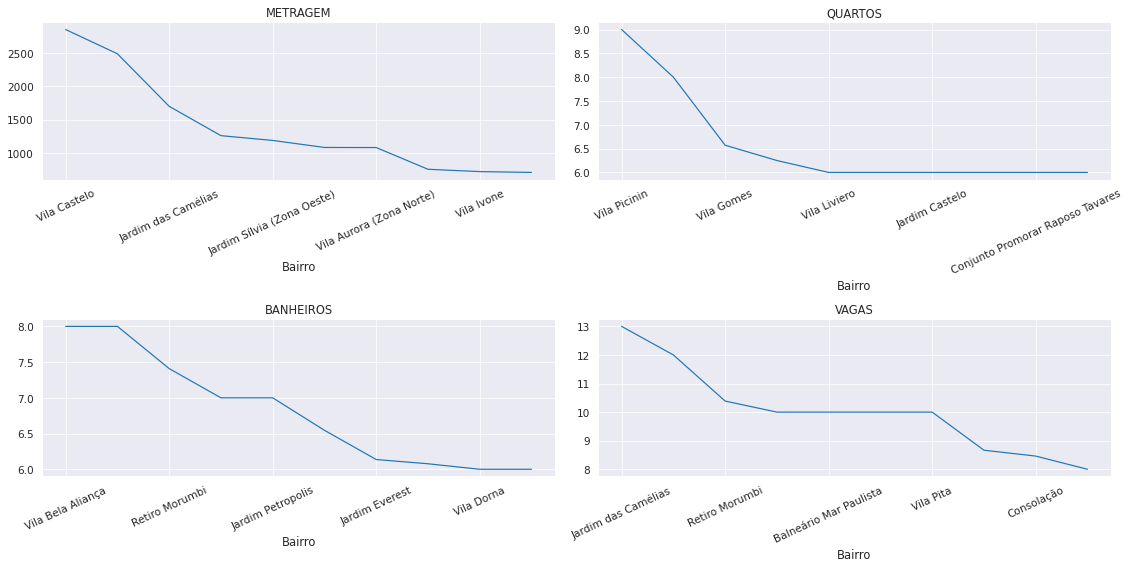

In [41]:
# 1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo) + quartos, vagas e banheiros
'''Foram selecionandos apenas os 10 bairros com as maiores medias por conta do grande numero de bairros'''
media_metragem_bairro = data.groupby('Bairro').mean()

cols = list(media_metragem_bairro.columns)

for n, col in enumerate(cols):

  ax = plt.subplot(2,2, n + 1)

  (media_metragem_bairro[col]
   .sort_values(ascending= False)[1:11]  # exclusao de possiveis outliers
   .plot(figsize = (16,8), ax = ax))
  
  ax.set_title(col.upper())
  ax.tick_params(axis = 'x', rotation = 25)

plt.tight_layout()

In [42]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

# Query 1:
tem_imoveis_vila = data['Bairro'] == 'Vila Mariana'
data[tem_imoveis_vila]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None


In [43]:
# Query 2:
data[data['Bairro'] == 'Vila Mariana']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None


In [44]:
# Query 3:
data.query("Bairro == 'Vila Mariana'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None
